# Ejercicio 3 – Predicción de Consumo Excesivo de Agua  
### Fase 1: CARGA Y EXPLORACIÓN GENERAL  
por Jessica | Rama: Steph

En esta fase se realiza la carga inicial del dataset y una exploración general de sus características. Esto incluye:

- Visualizar las dimensiones y nombres de las columnas.
- Mostrar las primeras filas del dataset.
- Verificar los tipos de datos.
- Detectar posibles valores nulos o errores.


In [19]:
# Cargar pandas
import pandas as pd

# Cargar el archivo CSV (ajusta el nombre si es diferente)
df = pd.read_csv("../datasets/consumo_agua.csv")

# Mostrar dimensiones
print("Dimensiones del dataset:", df.shape)

# Mostrar nombres de columnas
print("\nColumnas disponibles:")
print(df.columns.tolist())

# Mostrar primeras filas
print("\nPrimeras filas:")
display(df.head())

# Resumen estadístico de variables numéricas
print("Resumen estadístico de variables numéricas:")
print(df.describe())

# Resumen de variables categóricas
print("\nResumen de variables categóricas:")
print(df.describe(include='object'))

# Valores únicos por columna
print("\nValores únicos por columna:")
print(df.nunique())


Dimensiones del dataset: (71102, 16)

Columnas disponibles:
['fecha_referencia', 'anio', 'bimestre', 'consumo_total_mixto', 'consumo_prom_dom', 'consumo_total_dom', 'consumo_prom_mixto', 'consumo_total', 'consumo_prom', 'consumo_prom_no_dom', 'consumo_total_no_dom', 'indice_des', 'colonia', 'alcaldia', 'latitud', 'longitud']

Primeras filas:


,fecha_referencia,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
0,2019-06-30,2019,3,159.72,42.566364,468.23,53.24,631.00,42.066667,3.05,3.05,ALTO,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455260,-99.112662
1,2019-06-30,2019,3,0.00,35.936667,107.81,0.00,115.13,28.782500,7.32,7.32,MEDIO,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455260,-99.112662
2,2019-06-30,2019,3,0.00,24.586000,122.93,0.00,197.96,32.993333,75.03,75.03,POPULAR,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455720,-99.113582
3,2019-06-30,2019,3,0.00,0.000000,0.00,0.00,253.53,84.510000,84.51,253.53,BAJO,GERTRUDIS SANCHEZ 3A SECCION,GUSTAVO A. MADERO,19.459647,-99.104469
4,2019-06-30,2019,3,56.72,67.436250,539.49,56.72,839.35,76.304545,121.57,243.14,BAJO,PRO HOGAR I,AZCAPOTZALCO,19.474161,-99.146750


Resumen estadístico de variables numéricas:
          anio      bimestre  consumo_total_mixto  consumo_prom_dom  \
count  71102.0  71102.000000         62775.000000      66282.000000   
mean    2019.0      2.006807           174.359929         29.132386   
std        0.0      0.814393           312.663596         64.565925   
min     2019.0      1.000000             0.000000          0.000000   
25%     2019.0      1.000000             0.000000         18.690547   
50%     2019.0      2.000000            79.940000         26.414248   
75%     2019.0      3.000000           233.320000         36.246563   
max     2019.0      3.000000         23404.440000       7796.410000   

       consumo_total_dom  consumo_prom_mixto  consumo_total  consumo_prom  \
count       66282.000000        62775.000000   71102.000000  71102.000000   
mean         1186.263611           50.636234    1695.847222    111.217399   
std          2771.038307          130.408673    3555.697457   1069.949262   
min     

**1.1: Tipos de datos y valores nulos**  

En esta sección se inspeccionan los tipos de datos de cada columna del dataset, así como la existencia de valores nulos o faltantes que pudieran afectar el entrenamiento del modelo. Esta información permitirá tomar decisiones sobre limpieza o imputación de datos.


In [20]:
# Verificar tipos de datos
print("Tipos de datos por columna:\n", df.dtypes)

# Verificar valores nulos
print("\nConteo de valores nulos por columna:\n", df.isnull().sum())



Tipos de datos por columna:
 fecha_referencia         object
anio                      int64
bimestre                  int64
consumo_total_mixto     float64
consumo_prom_dom        float64
consumo_total_dom       float64
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
consumo_total_no_dom    float64
indice_des               object
colonia                  object
alcaldia                 object
latitud                 float64
longitud                float64
dtype: object

Conteo de valores nulos por columna:
 fecha_referencia           0
anio                       0
bimestre                   0
consumo_total_mixto     8327
consumo_prom_dom        4820
consumo_total_dom       4820
consumo_prom_mixto      8327
consumo_total              0
consumo_prom               0
consumo_prom_no_dom        0
consumo_total_no_dom       0
indice_des                 0
colonia                  216
alcaldia                 216


**1.2 Exploración de la variable objetivo**  

En este caso, la predicción será sobre si una manzana tendrá consumo excesivo de agua en un bimestre. Para poder hacer esto, necesitamos definir una nueva columna binaria (0 o 1) como variable objetivo (y). Por ahora, vamos a explorar la distribución de la variable que más se puede asociar con el consumo alto: consumo_prom.

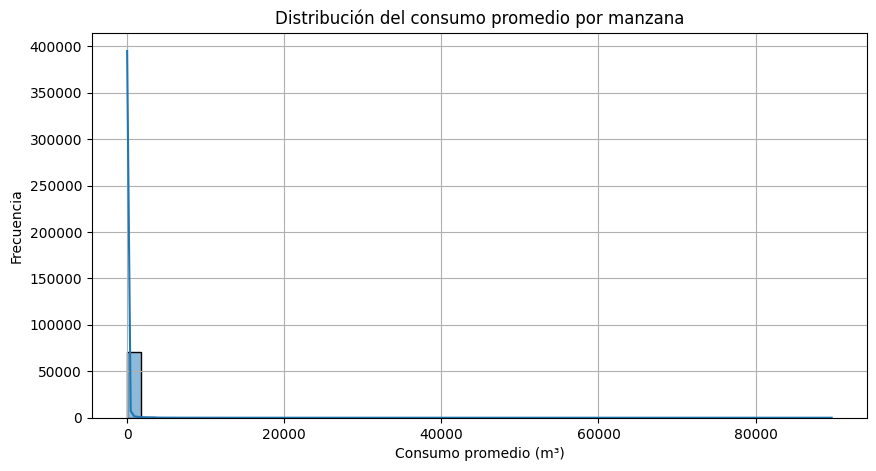

Tamaño después de eliminar nulos: (62035, 16)


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma del consumo promedio general
plt.figure(figsize=(10, 5))
sns.histplot(df['consumo_prom'], bins=50, kde=True)
plt.title("Distribución del consumo promedio por manzana")
plt.xlabel("Consumo promedio (m³)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Eliminar filas con nulos en columnas relevantes para el análisis
columnas_a_limpiar = [
    'consumo_total_mixto', 'consumo_prom_dom', 'consumo_total_dom',
    'consumo_prom_mixto', 'colonia', 'alcaldia'
]
df_limpio = df.dropna(subset=columnas_a_limpiar).copy()
print("Tamaño después de eliminar nulos:", df_limpio.shape)


**1.3 Definición de variable objetivo (consumo_excesivo)**

Vamos a crear una nueva variable binaria consumo_excesivo, que será 1 si el consumo promedio (consumo_prom) es mayor al percentil 90, y 0 en caso contrario. Esto nos permite considerar como "excesivos" solo los valores realmente altos.

In [22]:
# Definir consumo excesivo como el percentil 90 del consumo total
umbral = df_limpio['consumo_total'].quantile(0.90)
df_limpio['exceso'] = (df_limpio['consumo_total'] > umbral).astype(int)

# Ver distribución de la variable objetivo
print("Distribución de 'exceso':\n", df_limpio['exceso'].value_counts(normalize=True))


Distribución de 'exceso':
 exceso
0    0.899992
1    0.100008
Name: proportion, dtype: float64


**1.4 Selección de variables predictoras**

En esta etapa se seleccionan las variables que serán utilizadas como entrada para el modelo de predicción. Se eliminan columnas que no aportan información útil para el aprendizaje (por ejemplo, identificadores únicos, fechas, columnas redundantes o que serán derivadas de otras), así como aquellas que no estarán disponibles al momento de hacer predicciones.

In [23]:
columnas_modelo = [
    'anio', 'bimestre', 'consumo_total_mixto', 'consumo_prom_dom',
    'consumo_total_dom', 'consumo_prom_mixto', 'consumo_prom',
    'consumo_prom_no_dom', 'consumo_total_no_dom', 'indice_des', 'alcaldia'
]

X = df_limpio[columnas_modelo].copy()
y = df_limpio['exceso'].copy()

print("Columnas seleccionadas para X:\n", X.columns.tolist())
print("\nDimensiones finales:\nX:", X.shape, "\ny:", y.shape)


Columnas seleccionadas para X:
 ['anio', 'bimestre', 'consumo_total_mixto', 'consumo_prom_dom', 'consumo_total_dom', 'consumo_prom_mixto', 'consumo_prom', 'consumo_prom_no_dom', 'consumo_total_no_dom', 'indice_des', 'alcaldia']

Dimensiones finales:
X: (62035, 11) 
y: (62035,)


**1.5 Codificación de variables categóricas (One-Hot Encoding)**

In [24]:
# Codificar columnas categóricas
columnas_categoricas = ['indice_des', 'alcaldia']
X_encoded = pd.get_dummies(X, columns=columnas_categoricas)

print("Columnas categóricas a codificar:", columnas_categoricas)
print("Dimensiones después de codificar:", X_encoded.shape)


Columnas categóricas a codificar: ['indice_des', 'alcaldia']
Dimensiones después de codificar: (62035, 29)


**1.6 Escalamiento y división del conjunto de datos**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (49628, 29)
X_test: (12407, 29)
y_train: (49628,)
y_test: (12407,)


**2. Modelado y evaluación base**  

**2.1 Entrenamiento del modelo base (Random Forest)**  
Objetivo: Entrenar un modelo de clasificación utilizando un Random Forest sin ajuste de hiperparámetros, para establecer una línea base de desempeño.

El Random Forest es un algoritmo robusto que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. En esta etapa inicial no se realiza optimización, solo se entrena con los parámetros por defecto para evaluar el comportamiento general del modelo.




In [26]:
# 2.1 Entrenamiento del modelo base (Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Inicialización y entrenamiento del modelo base
modelo_base = RandomForestClassifier(random_state=42)
modelo_base.fit(X_train_scaled, y_train)

# Predicción sobre el conjunto de prueba
y_pred = modelo_base.predict(X_test_scaled)


**2.2 Evaluación del modelo base**

Se emplean las métricas clásicas: precisión, recall, f1-score y exactitud. Además, se imprime un reporte completo que permite observar el comportamiento del modelo para cada clase. Esto permitirá comparar el rendimiento más adelante cuando se realicen mejoras o ajustes.

In [27]:
# 2.2 Evaluación del modelo base
from sklearn.metrics import classification_report, accuracy_score

# Evaluación del modelo
precision_base = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo base: {precision_base:.4f}")

# Reporte completo por clase
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))


Precisión del modelo base: 0.9952

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11166
           1       0.99      0.96      0.98      1241

    accuracy                           1.00     12407
   macro avg       0.99      0.98      0.99     12407
weighted avg       1.00      1.00      1.00     12407



Con base en estos resultados necesiamos comparar el rendimiento del modelo en el conjunto de entrenamiento y en el de prueba. Si la precisión en entrenamiento es muy superior a la de prueba, podemos estar sobreajustando.

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Precisión en entrenamiento
y_train_pred = modelo_base.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en entrenamiento: {train_accuracy:.4f}")

# Precisión en prueba (ya la habíamos calculado, pero la incluimos para comparar)
y_test_pred = modelo_base.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión en prueba: {test_accuracy:.4f}")


Precisión en entrenamiento: 1.0000
Precisión en prueba: 0.9952


 **2.3 Matriz de confusión**  

Para complementar la evaluación del modelo base, se genera la matriz de confusión, la cual permite visualizar el desempeño del clasificador en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Esta matriz es útil para detectar si el modelo está clasificando erróneamente los casos positivos (consumo excesivo) o negativos (consumo normal), lo cual es especialmente relevante dado que existe un desbalance de clases.


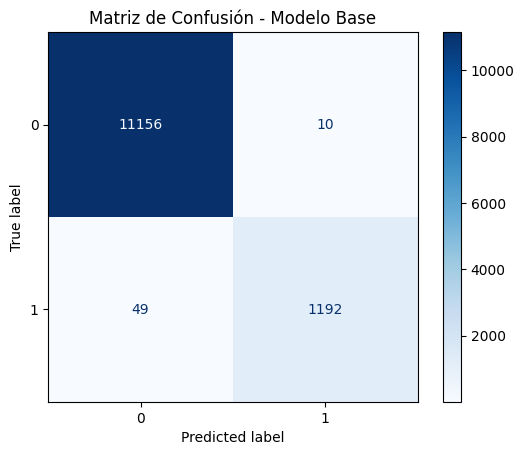

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Calcular la matriz de confusión
matriz_conf = confusion_matrix(y_test, y_pred)

# 2. Mostrar la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf, display_labels=modelo_base.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Modelo Base')
plt.grid(False)
plt.show()


**2.4 Curva ROC y AUC - Modelo Base**

La curva ROC (Receiver Operating Characteristic) es una herramienta que permite visualizar el rendimiento de un modelo de clasificación binaria a distintos umbrales de decisión. Muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).

El área bajo la curva (AUC) cuantifica la capacidad del modelo para distinguir entre las clases. Un valor de AUC cercano a 1.0 indica un modelo con excelente discriminación.

En esta sección, graficamos la curva ROC del modelo base (Random Forest) y reportamos el AUC correspondiente.


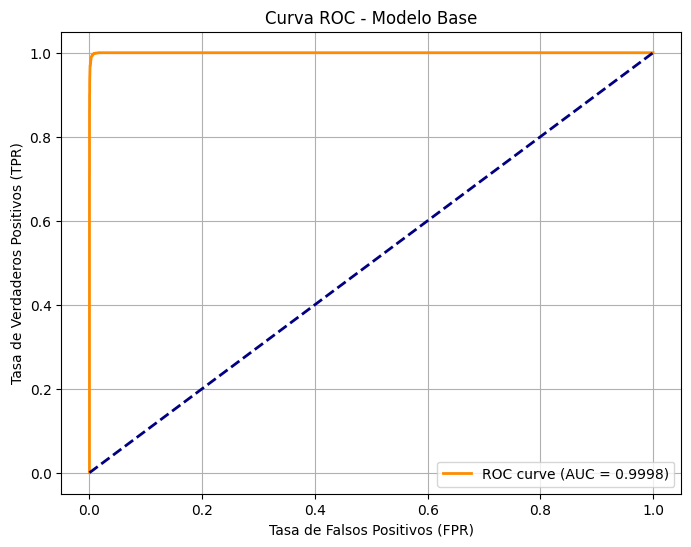

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener probabilidades de clase positiva
y_proba = modelo_base.predict_proba(X_test_scaled)[:, 1]

# Calcular FPR, TPR y umbrales
fpr, tpr, umbrales = roc_curve(y_test, y_proba)

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo Base')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**3.1 Evaluación de la importancia de variables**

Una de las ventajas del modelo Random Forest es que permite identificar la relevancia relativa de cada variable en la predicción. Esta información es valiosa para interpretar el modelo y comprender qué factores tienen mayor impacto en la clasificación de hogares con gasto excesivo en luz.

A continuación, se muestran las importancias de las variables calculadas por el modelo base, ordenadas de mayor a menor.


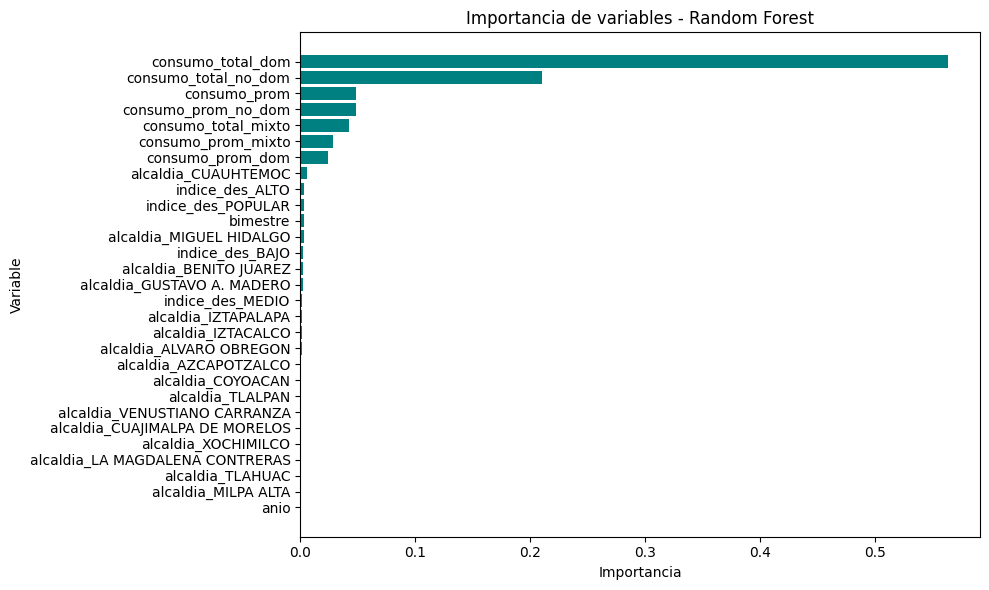

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener importancias desde el modelo ya entrenado
importancias = modelo_base.feature_importances_

# Crear un DataFrame con los nombres de las columnas codificadas
importancia_df = pd.DataFrame({
    'Variable': X_encoded.columns,
    'Importancia': importancias
})

# Ordenar de mayor a menor
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'], color='teal')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de variables - Random Forest')
plt.gca().invert_yaxis()  # La más importante arriba
plt.tight_layout()
plt.show()


**Análisis de resultados**

Los resultados indican que las variables más influyentes para determinar si un hogar presenta consumo excesivo de luz son:

- **`consumo_total_dom`**: consumo total del sector doméstico,
- **`consumo_total_no_dom`**: consumo total en sectores no domésticos del hogar (negocios, etc.),
- **`consumo_prom`** y sus desgloses.

Estas variables concentran la mayor parte del poder predictivo del modelo, lo que sugiere que la intensidad y tipo de consumo eléctrico es el factor determinante en la clasificación.

En cambio, variables como el **año**, **bimestre**, o algunas alcaldías tienen una importancia marginal, lo que puede indicar una menor variación explicativa en el comportamiento del consumo excesivo entre periodos o zonas geográficas.

Este análisis permitirá en etapas posteriores simplificar el modelo o hacer análisis más enfocados.


**3.2 Comparación con modelos balanceados**

Dado que la variable objetivo está desbalanceada (la clase "consumo excesivo" es minoritaria), es importante comparar el rendimiento del modelo base con alternativas que mitiguen este problema. Probamos dos enfoques:

- Aplicar `class_weight='balanced'` en el clasificador Random Forest.
- Usar la técnica de sobremuestreo **SMOTE** (Synthetic Minority Over-sampling Technique) para generar ejemplos sintéticos de la clase minoritaria.

Evaluamos ambos enfoques en términos de precisión, recall, F1-score y curva ROC, y los comparamos con el modelo original.


In [33]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


In [1]:
!pip install -U scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)


In [1]:
import sklearn
import imblearn
print("scikit-learn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)


scikit-learn: 1.6.1
imblearn: 0.13.0
